<a href="https://colab.research.google.com/github/rodrigorissettoterra/MovieLens_e_TMDB/blob/main/Estat%C3%ADstica_The_Movie_DataBase_(TMDB)_e_movieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estatística com TMDB

Análise estatística de dados extraídos do [**The Movie Database (TMDB)**](https://www.themoviedb.org/?language=pt-BR).

A base de dados pode ser baixada diretamente pelo site do Kaggle, **[clicando aqui](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv)**.

##Preparando o ambiente

###Importando as bibliotecas necessárias

In [270]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
from scipy.stats import normaltest
from scipy.stats import ranksums

###Carregando a base de dados utilizada

In [189]:
tmdb = pd.read_csv('/content/drive/MyDrive/Base de dados/TMDB/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


###Informações sobre a base de dados

In [190]:
print('Dimensões da base de dados:')
print('A base de dados possui {} linhas e {} colunas.'.format(tmdb.shape[0], tmdb.shape[1]))

Dimensões da base de dados:
A base de dados possui 4803 linhas e 20 colunas.


####Dados estatísticos

In [191]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


###Visualizando dados

####Votações

#####Distribuição de votos (Histograma)

Text(0.5, 0.98, 'Votos em filmes do TMDB (100.000 registros)')

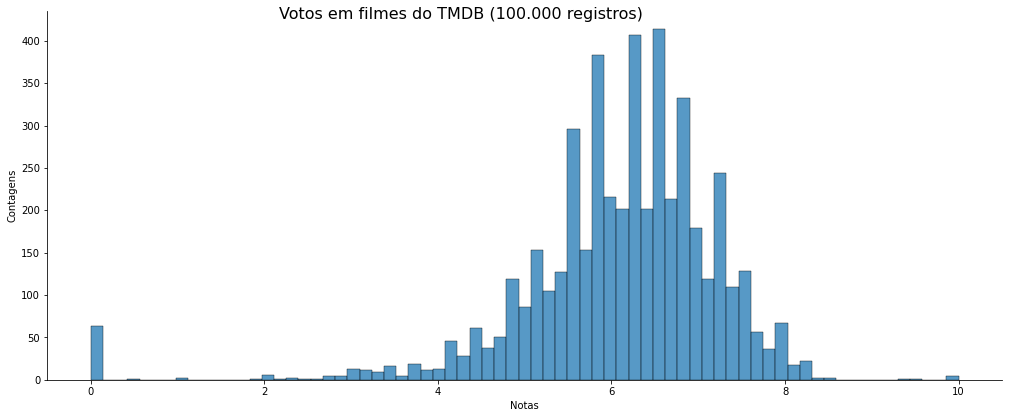

In [192]:
graf_tmdb = sns.displot(data = tmdb, x = tmdb['vote_average'])
graf_tmdb.figure.set_size_inches(16,6)
graf_tmdb.set(xlabel = 'Notas', ylabel = 'Contagens')
graf_tmdb.fig.suptitle('Votos em filmes do TMDB (100.000 registros)', size = 16)

#####Distribuição de votos (Boxplot)

Text(0.5, 1.0, 'Votos em filmes do TMDB (100.000 registros)')

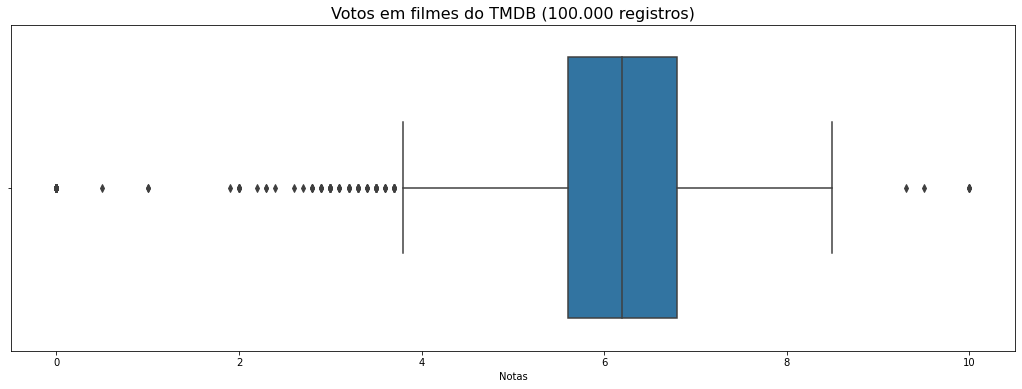

In [193]:
graf_tmdb_boxplot = sns.boxplot(data = tmdb, x = tmdb['vote_average'])
graf_tmdb_boxplot.figure.set_size_inches(18,6)
graf_tmdb_boxplot.set(xlabel = 'Notas')
graf_tmdb_boxplot.set_title('Votos em filmes do TMDB (100.000 registros)', size = 16)

Existem outliers, como notas = 0 e notas = 10

#####Contando o número de votos = 0

In [194]:
nota_zero_sem_votacao = tmdb.value_counts((tmdb['vote_average'] == 0) & (tmdb['vote_count'] != 0))
nota_zero_com_votacao = tmdb.value_counts(tmdb['vote_average'] == 0) - nota_zero_sem_votacao
print('Temos {} nota ZERO na base de dados sem voto e {} filmes que receberam ZERO como nota.'.format(nota_zero_sem_votacao[1], nota_zero_com_votacao[1]))

Temos 1 nota ZERO na base de dados sem voto e 62 filmes que receberam ZERO como nota.


#####Contando o número de votos = 10

In [195]:
nota_dez = tmdb.value_counts((tmdb['vote_average'] == 10) & (tmdb['vote_count'] != 0))
print('Temos {} votos com nota DEZ na base de dados.'.format(nota_dez[1]))

Temos 4 votos com nota DEZ na base de dados.


#####Filtrando filmes com 10 ou mais votos

Olhando para os dados estatístico dos filmes que acumularam 10 votos, pois nota-se uma quantidade significativa de filmes sem votação, oque pode prejudicar a análise.

In [196]:
tmdb_com_mais_de_10_votos = tmdb.query('vote_count >= 10')

#####Informações estatísticas da base de dados com filtro

In [197]:
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


###Visualizando filmes com 10 ou mais votos acumulados

####Distribuição de Notas de filmes com 10 ou mais votos (Histograma)

Text(0.5, 0.98, 'Notas de filmes com 10 ou mais votos acumulados TMDB')

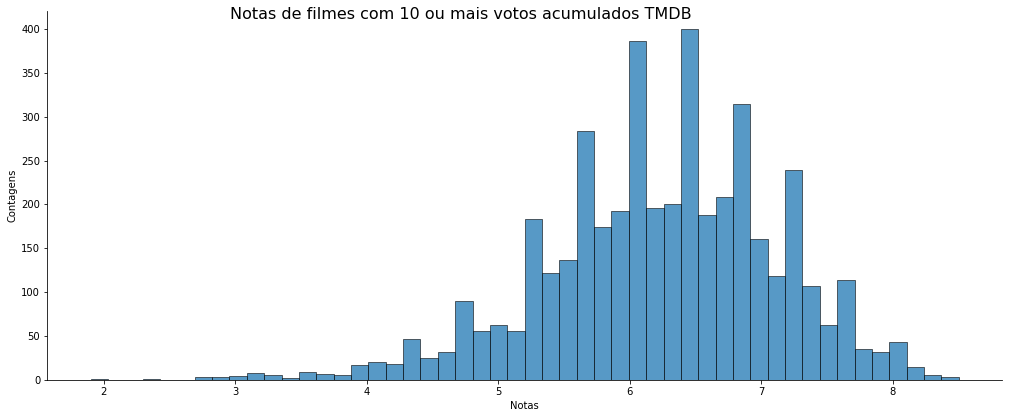

In [198]:
graf_tmdb_10 = sns.displot(data = tmdb_com_mais_de_10_votos, x = tmdb_com_mais_de_10_votos.vote_average)
graf_tmdb_10.figure.set_size_inches(16,6)
graf_tmdb_10.set(xlabel = 'Notas', ylabel = 'Contagens')
graf_tmdb_10.fig.suptitle('Notas de filmes com 10 ou mais votos acumulados TMDB', size = 16)

####Distribuição de Notas de filmes com 10 ou mais votos acumulados (Histograma)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


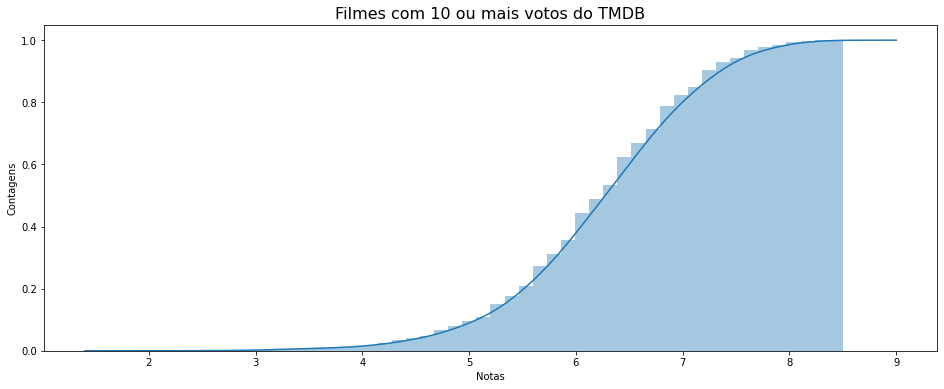

In [199]:
graf_tmdb_com_filtro_acumulado = sns.distplot(tmdb_com_mais_de_10_votos.vote_average,
                                                   hist_kws = {'cumulative':True},
                                                   kde_kws = {'cumulative':True})
plt.title('Filmes com 10 ou mais votos do TMDB', size = 16)
graf_tmdb_com_filtro_acumulado.set(xlabel = 'Notas', ylabel = 'Contagens')
graf_tmdb_com_filtro_acumulado.figure.set_size_inches(16,6)

Cerca de 40% dos filmes que receberam alguma nota, tem nota abaixo de 6,0.

####Distribuição de Notas de filmes com 10 ou mais votos acumulados  (Boxplot)

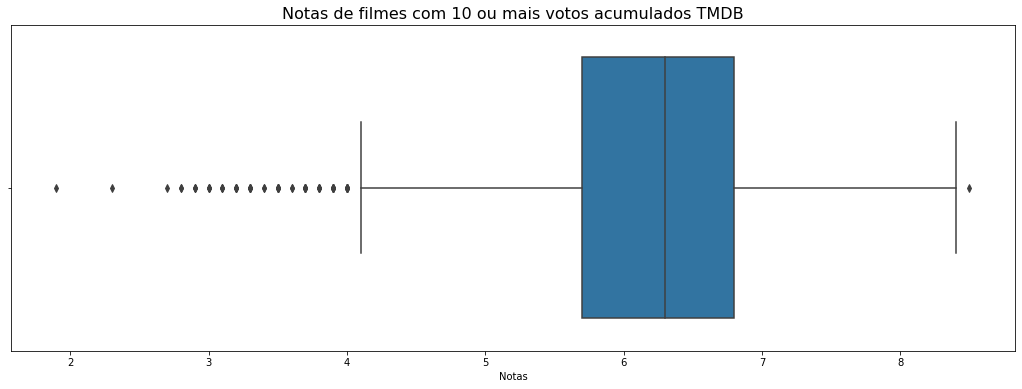

In [200]:
graf_tmdb_10_boxplot = sns.boxplot(data = tmdb_com_mais_de_10_votos, x = tmdb_com_mais_de_10_votos.vote_average)
graf_tmdb_10_boxplot.figure.set_size_inches(18,6)
graf_tmdb_10_boxplot.set(xlabel = 'Notas')
graf_tmdb_10_boxplot.set_title('Notas de filmes com 10 ou mais votos acumulados TMDB', size = 16)
graf_tmdb_10_boxplot = graf_tmdb_10

#Estatística com Movielens

##Carregando a base de dados

In [201]:
movielens = pd.read_csv('/content/drive/MyDrive/Base de dados/TMDB/ratings.csv')
movielens

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


##Informações sobre a base de dados

In [202]:
print('Dimensões da base de dados:')
print('A base de dados possui {} linhas e {} colunas.'.format(movielens.shape[0], tmdb.shape[1]))

Dimensões da base de dados:
A base de dados possui 100836 linhas e 20 colunas.


###Dados estatísticos

In [203]:
movielens.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


##Organizando a base de dados por grupos de notas

In [204]:
nota_media_por_filme = movielens.groupby('movieId').mean()['rating']
nota_media_por_filme

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

##Distribuição de votos

###Histograma

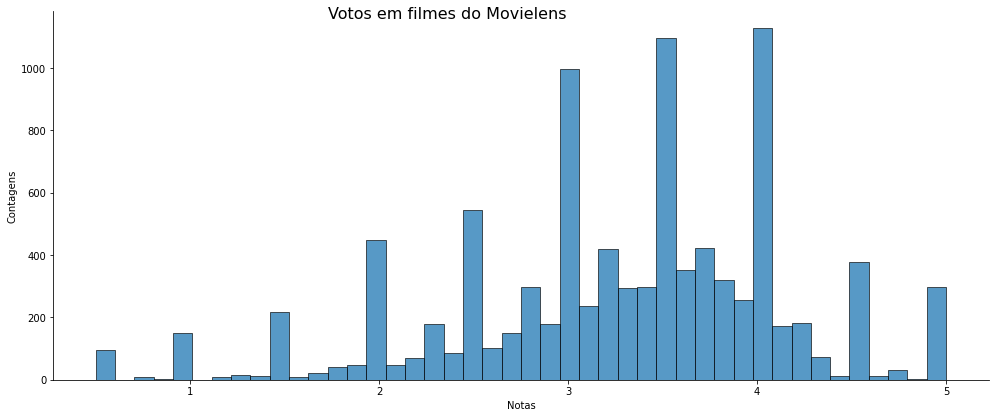

In [205]:
graf_movielens = sns.displot(nota_media_por_filme)
graf_movielens.figure.set_size_inches(16,6)
graf_movielens.set(xlabel = 'Notas', ylabel = 'Contagens')
graf_movielens.fig.suptitle('Votos em filmes do Movielens', size = 16)
graf_movielens = graf_movielens

###Boxplot

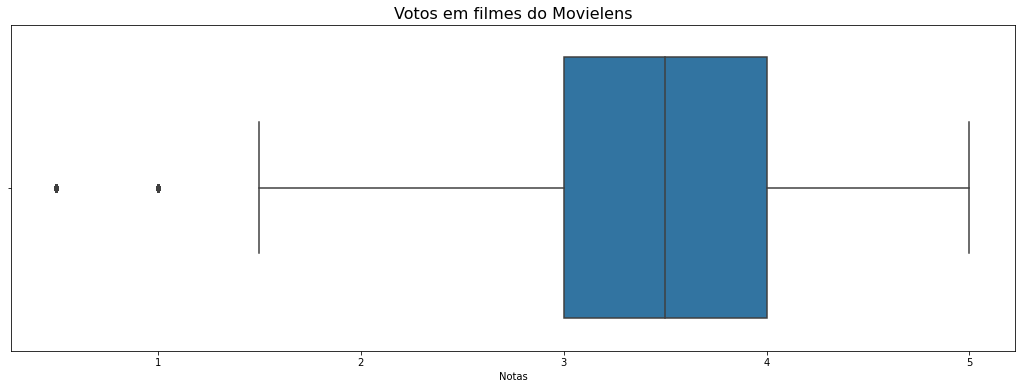

In [206]:
graf_movielens_boxplot = sns.boxplot(data = movielens, x = movielens['rating'])
graf_movielens_boxplot.figure.set_size_inches(18,6)
graf_movielens_boxplot.set(xlabel = 'Notas')
graf_movielens_boxplot.set_title('Votos em filmes do Movielens', size = 16)
graf_movielens_boxplot = graf_movielens_boxplot

###Filtrando filmes com 10 ou mais votos

In [207]:
movielens_com_mais_de_10_votos = movielens.groupby(movielens['movieId']).count()
quant_filmes_com_mais_10 = movielens_com_mais_de_10_votos.query('rating >= 10').index
valores = quant_filmes_com_mais_10.values
nota_media_dos_filmes_com_10_ou_mais_votos = nota_media_por_filme.loc[valores]
nota_media_dos_filmes_com_10_ou_mais_votos

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

####Histograma com filtro

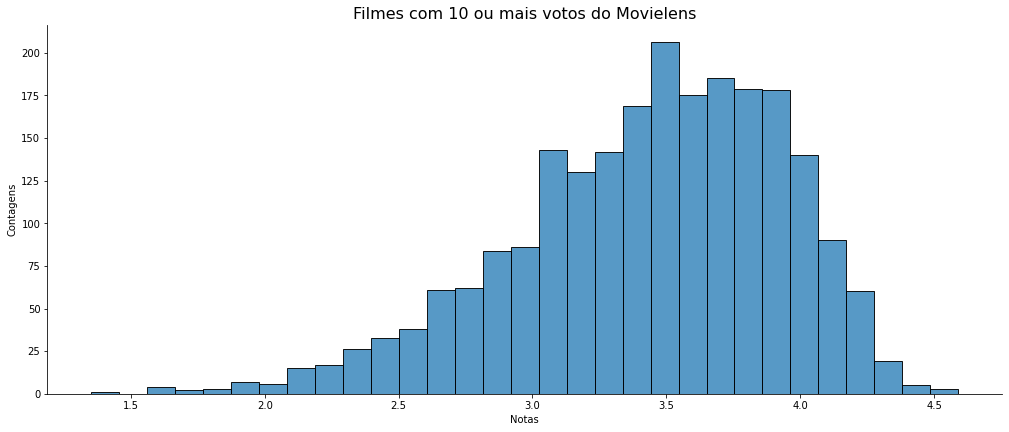

In [208]:
graf_movielens_com_filtro = sns.displot(nota_media_dos_filmes_com_10_ou_mais_votos)
plt.title('Filmes com 10 ou mais votos do Movielens', size = 16)
graf_movielens_com_filtro.set(xlabel = 'Notas', ylabel = 'Contagens')
graf_movielens_com_filtro.figure.set_size_inches(16,6)

####Histograma com filtro e valores acumulados

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


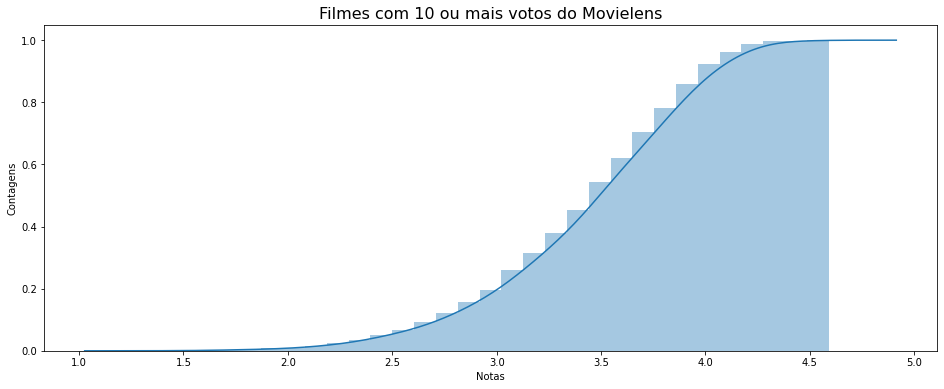

In [209]:
graf_movielens_com_filtro_acumulado = sns.distplot(nota_media_dos_filmes_com_10_ou_mais_votos.values,
                                                   hist_kws = {'cumulative':True},
                                                   kde_kws = {'cumulative':True})
plt.title('Filmes com 10 ou mais votos do Movielens', size = 16)
graf_movielens_com_filtro_acumulado.set(xlabel = 'Notas', ylabel = 'Contagens')
graf_movielens_com_filtro_acumulado.figure.set_size_inches(16,6)

Cerca de 50% dos filmes que receberam alguma nota, tem nota abaixo de 3,5.

####Boxplot com filtro

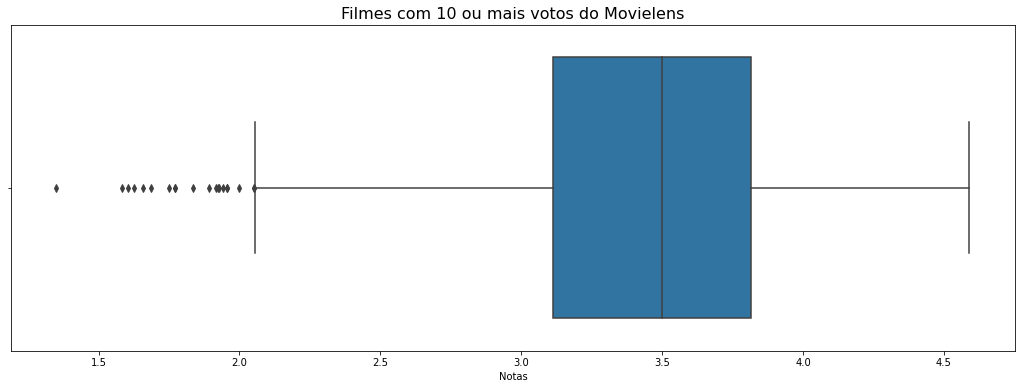

In [210]:
graf_movielens_com_filtro_boxplot = sns.boxplot(data = nota_media_dos_filmes_com_10_ou_mais_votos, x = nota_media_dos_filmes_com_10_ou_mais_votos)
graf_movielens_com_filtro_boxplot.figure.set_size_inches(18,6)
graf_movielens_com_filtro_boxplot.set(xlabel = 'Notas')
graf_movielens_com_filtro_boxplot.set_title('Filmes com 10 ou mais votos do Movielens', size = 16)
graf_movielens_com_filtro_boxplot = graf_movielens_com_filtro_boxplot

#Analisando a distribuição dos dados capturados de outros campos do TMDB

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Número de votos em filmes no TMDB 5k, com 10 ou mais votos')

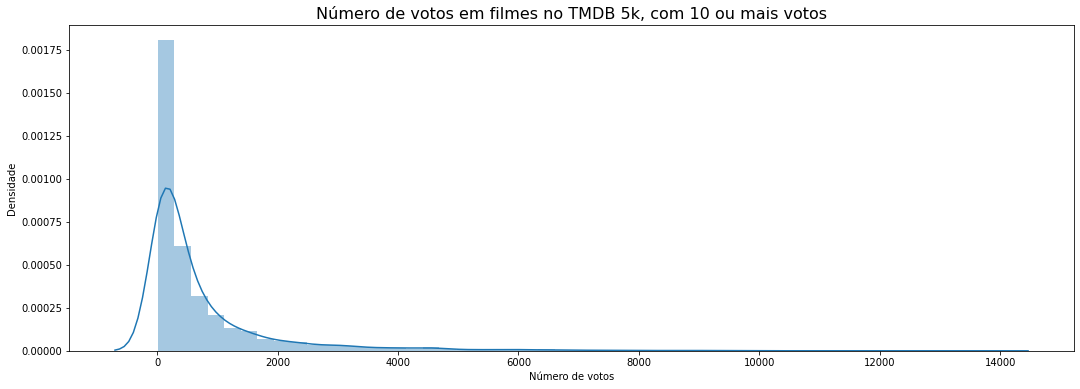

In [211]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.figure.set_size_inches(18,6)
ax.set(xlabel = 'Número de votos', ylabel = 'Densidade')
ax.set_title('Número de votos em filmes no TMDB 5k, com 10 ou mais votos', size = 16)

A maioria dos filmes recebem poucos votos.

#Filmes com orçamentos maiores que zero

In [212]:
tmdb.query('budget > 0').budget

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4791           13
4792        20000
4796         7000
4798       220000
4799         9000
Name: budget, Length: 3766, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Orçamento dos filmes no TMDB 5k, maiores que zero')

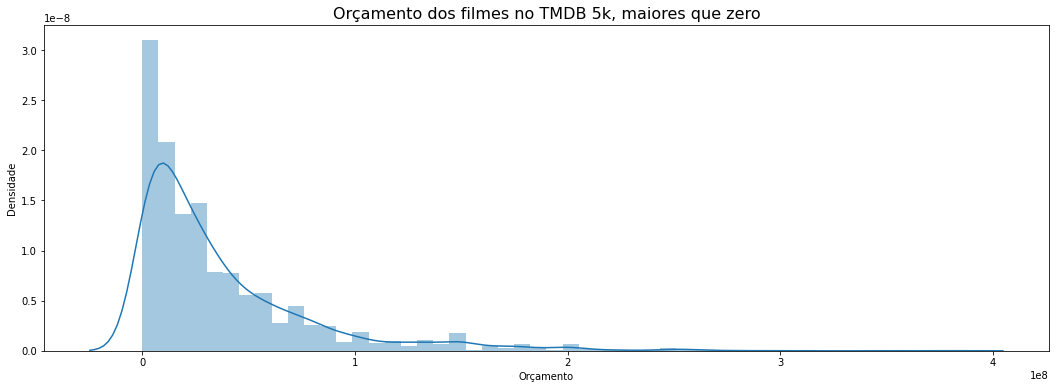

In [213]:
graf_orcamento_hist = sns.distplot(tmdb.query('budget > 0').budget)
graf_orcamento_hist.figure.set_size_inches(18,6)
graf_orcamento_hist.set(xlabel = 'Orçamento', ylabel = 'Densidade')
graf_orcamento_hist.set_title('Orçamento dos filmes no TMDB 5k, maiores que zero', size = 16)

#Popularidade dos filmes

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularidade dos filmes no TMDB 5k, maiores que zero')

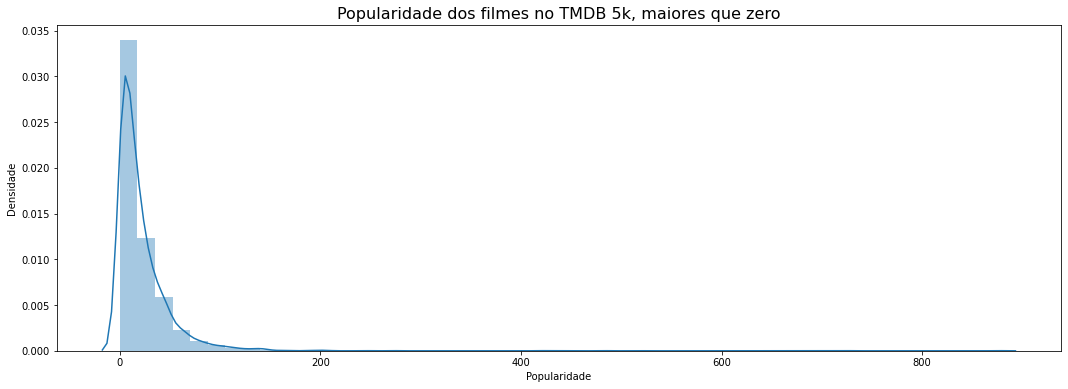

In [214]:
graf_popularidade_hist = sns.distplot(tmdb.popularity)
graf_popularidade_hist.figure.set_size_inches(18,6)
graf_popularidade_hist.set(xlabel = 'Popularidade', ylabel = 'Densidade')
graf_popularidade_hist.set_title('Popularidade dos filmes no TMDB 5k, maiores que zero', size = 16)

Poucos filmes possuem uma popularidade alta.

#Tempo de duração dos filmes

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duração dos filmes no TMDB 5k, maiores que zero')

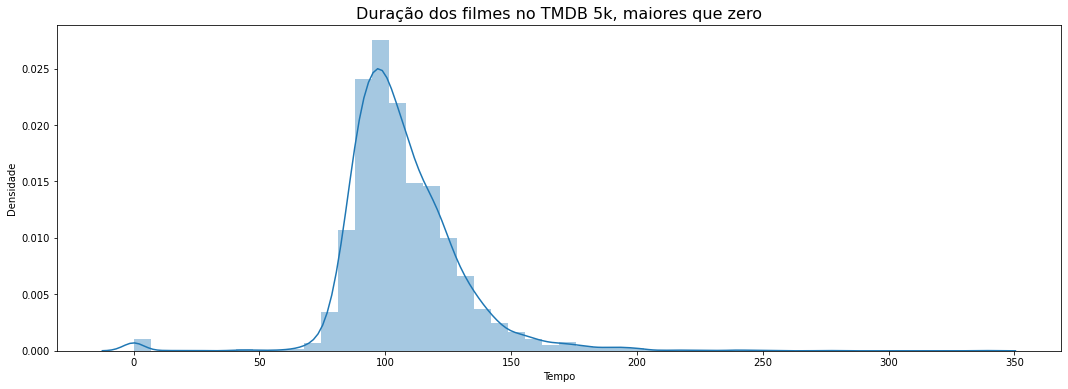

In [215]:
graf_tempo_hist = sns.distplot(tmdb.runtime)
graf_tempo_hist.figure.set_size_inches(18,6)
graf_tempo_hist.set(xlabel = 'Tempo', ylabel = 'Densidade')
graf_tempo_hist.set_title('Duração dos filmes no TMDB 5k, maiores que zero', size = 16)

É possível nota que existem filmes com duração zero, o que não tem sentido, portanto é preciso limpar a base de dados.

##Dados nulos na base de dados

In [216]:
print('A base de dados possui {} filmes sem o registro de suas durações.'.format(tmdb.runtime.isnull().sum()))

A base de dados possui 2 filmes sem o registro de suas durações.


####Visualizando o tempo de duração (tempo > zero)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


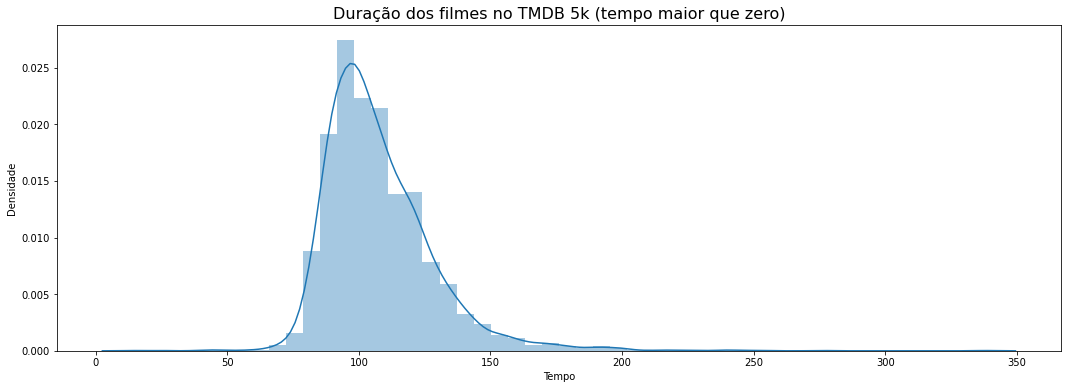

In [217]:
graf_tmdb_runtime_sem_null = sns.distplot(tmdb.query('runtime>0').runtime.dropna())
graf_tmdb_runtime_sem_null.figure.set_size_inches(18,6)
graf_tmdb_runtime_sem_null.set(xlabel = 'Tempo', ylabel = 'Densidade')
graf_tmdb_runtime_sem_null.set_title('Duração dos filmes no TMDB 5k (tempo maior que zero)', size = 16)
graf_tmdb_runtime_sem_null

####Visualizando o tempo de duração (tempo > zero) - Acumulado

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


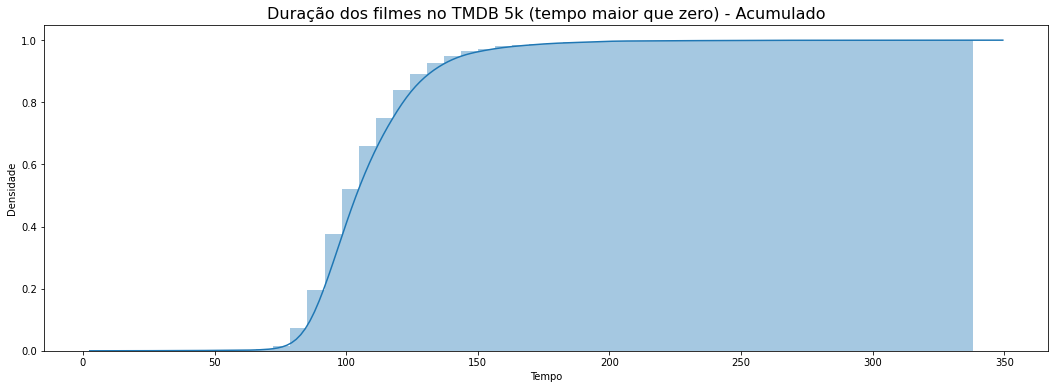

In [218]:
graf_tmdb_runtime_sem_null_acumulado = sns.distplot(
    tmdb.query('runtime>0').runtime.dropna(), hist_kws = {'cumulative':True},
    kde_kws = {'cumulative':True})
graf_tmdb_runtime_sem_null_acumulado.figure.set_size_inches(18,6)
graf_tmdb_runtime_sem_null_acumulado.set(xlabel = 'Tempo', ylabel = 'Densidade')
graf_tmdb_runtime_sem_null_acumulado.set_title('Duração dos filmes no TMDB 5k (tempo maior que zero) - Acumulado', size = 16)
graf_tmdb_runtime_sem_null_acumulado

Cerca de 80% dos filmes possuem aproximadamente 120 minutos.

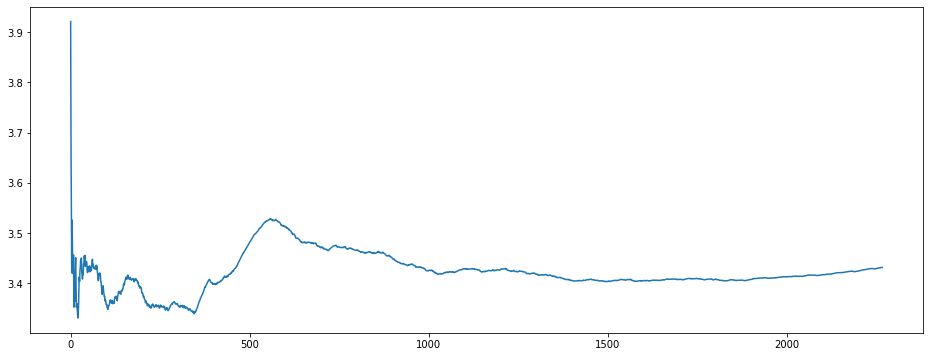

In [219]:
medias = []
for i in range (1,len(nota_media_dos_filmes_com_10_ou_mais_votos)):
  medias.append(nota_media_dos_filmes_com_10_ou_mais_votos[0:i].mean())

plt.plot(medias)

Nota-se que para poucas amostras, a variação na média é muito alta, conforme o número de amostras aumenta, a média tende a ser menos volátil.

In [220]:
print('No gráfico anterior, a média final (acumulada) chega no valor de {}, '.format(round(medias[len(nota_media_dos_filmes_com_10_ou_mais_votos)-2],2)))
print('o que representa a média de toda a base de dados, depois dos filtros terem sido aplicados.')

No gráfico anterior, a média final (acumulada) chega no valor de 3.43, 
o que representa a média de toda a base de dados, depois dos filtros terem sido aplicados.


#Teste Z

##Importando a biblioteca

In [221]:
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW

##Realizando o teste

In [222]:
zconfint(nota_media_dos_filmes_com_10_ou_mais_votos)

(3.4112459477469557, 3.452854733323563)

Assumindo que nossa base de dados seja grande o suficiente para aplicar esse tipo de teste, temos um intervalo de confiança entre 3,41 e 3,45 para outros filmes além da base de dados com características similares aos analisados aqui.

##Criando um objeto DescrStatsW

Apenas com o caráter de comparação com o teste Z

In [223]:
descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_10_ou_mais_votos)
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

#Analisando um filme específico

##Importando a base de dados com os nomes dos filmes

In [224]:
filmes = pd.read_csv('/content/drive/MyDrive/Base de dados/TMDB/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


MovieId = 1 → ***Toy Story (1995)***
</br>Todos os usuários que votaram no filme

In [225]:
notas_toy_story = movielens.query('movieId == 1')
notas_toy_story

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


##Visualizando as notas do Toy Store

###Histograma

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Notas do Toy Story, pelo movieLens')

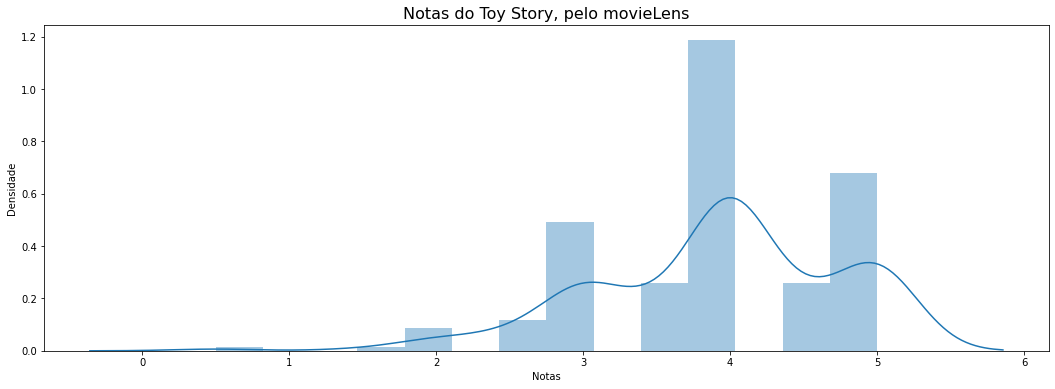

In [226]:
graf_hist_toy_story = sns.distplot(notas_toy_story.rating)
graf_hist_toy_story.figure.set_size_inches(18,6)
graf_hist_toy_story.set(xlabel = 'Notas', ylabel = 'Densidade')
graf_hist_toy_story.set_title('Notas do Toy Story, pelo movieLens', size = 16)

###Boxplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Notas do Toy Story, pelo movieLens')

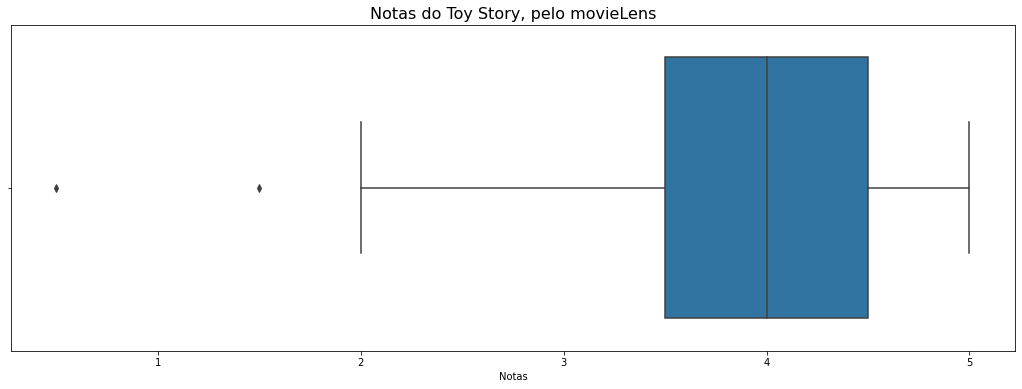

In [227]:
graf_toy_story_boxplot = sns.boxplot(notas_toy_story.rating)
graf_toy_story_boxplot.figure.set_size_inches(18,6)
graf_toy_story_boxplot.set(xlabel = 'Notas')
graf_toy_story_boxplot.set_title('Notas do Toy Story, pelo movieLens', size = 16)

Observações: </br>
* Mediana próximo da nota 4,</br>
* Primeiro quartil (75% das notas acima desse valor) é próximo de 2, </br>
* Terceiro quartil (75% das notas abaixo desse valor) é próximo de 5.</br>
* Alguns outliers, abaixo de 2.

###Comparando as notas do TMD e do MovieLens

In [228]:
nota_toy_story = (tmdb.loc[tmdb['original_title']=='Toy Story'])['vote_average']
nota_toy_story_tmdb = (nota_toy_story.sum())*10
nota_toy_story_movielens = round(((notas_toy_story.rating.mean())/6)*100,1)
print('A nota média do Toy Story, pelo TMDB é: {}%'.format(nota_toy_story_tmdb))
print('A nota média do Toy Story, pelo movieLens é: {}%'.format(nota_toy_story_movielens))

A nota média do Toy Story, pelo TMDB é: 77.0%
A nota média do Toy Story, pelo movieLens é: 65.3%


###Intervalo de confiança

Amostras

In [229]:
notas_toy_story.rating.count()

215

In [230]:
zconfint(notas_toy_story.rating)

(3.8093359183563402, 4.032524546759939)

###Medias acumuladas Toy Story

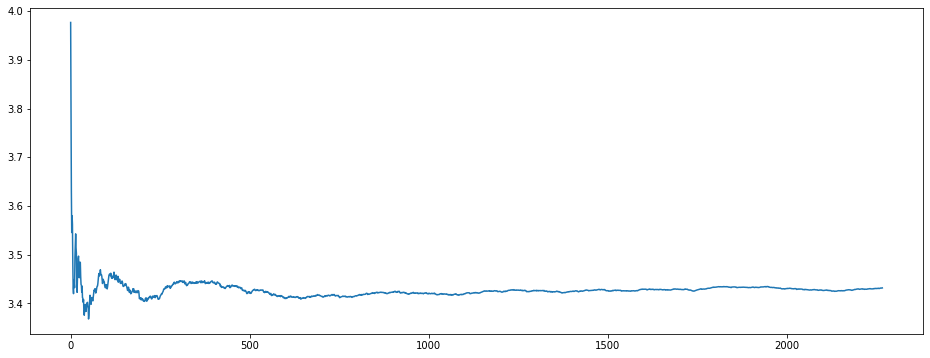

In [231]:
np.random.seed(75241)
temp = nota_media_dos_filmes_com_10_ou_mais_votos.sample(frac=1)
medias_acumuladas = [(temp[0:i].mean()) for i in range(1, len(temp))]
plt.plot(medias_acumuladas)

#Comparando a média de dois filmes com a do Toy Story

In [232]:
filmes.query('movieId in [1, 593, 72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

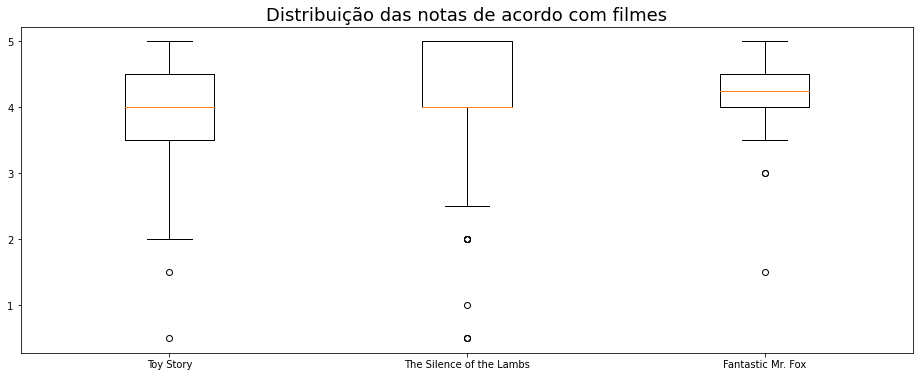

In [233]:
notas_1 = movielens.query('movieId == 1')
notas_593 = movielens.query('movieId == 593')
notas_72226 = movielens.query('movieId == 72226')
plt.rcParams["figure.figsize"] = (16,6)
plt.boxplot([notas_1.rating, notas_593.rating, notas_72226.rating], labels =['Toy Story', 'The Silence of the Lambs', 'Fantastic Mr. Fox'])
plt.title('Distribuição das notas de acordo com filmes', size = 18)

#Verificando dados do DataFrame para decidir qual teste será utilizado

In [261]:
df = pd.DataFrame(movielens.query('movieId in [1, 593, 72226]').groupby('movieId').count()['rating'])
df

,rating
movieId,
1,215
593,279
72226,18


O filme de ID 72226 (Fantastic Mr Fox) tem-se apenas 18 votos acumulados. 

##Verificando se as notas do Toy Story vêm de uma distribuição normal

In [266]:
stat_1, p_value_1 = normaltest(notas_1.rating)
print(stat_1, p_value_1)

18.220369223286593 0.00011053430732728716


Como p_value_1 < 0,05, descarta-se a Hipótese Nula (***H<sub>0</sub>***), portanto não vem de uma normal.

##Verificando se as notas do The Silence of the Lambs vêm de uma distribuição normal

In [268]:
stat_593, p_value_593 = normaltest(notas_593.rating)
print(stat_593, p_value_593)

84.41684362031029 4.667833086075242e-19


Como p_value_1 < 0,05, descarta-se a Hipótese Nula (***H<sub>0</sub>***), portanto não vem de uma normal.

##Verificando se as notas do Fantastic Mr. Fox vêm de uma distribuição normal

In [269]:
stat_72226, p_value_72226 = normaltest(notas_72226.rating)
print(stat_72226, p_value_72226)

11.45006074215247 0.003263254165930067


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Como p_value_1 < 0,05, descarta-se a Hipótese Nula (***H<sub>0</sub>***), portanto não vem de uma normal.

##Distribuição Não-Paramétrica

###Toy Story e The Silence of the Lambs

In [271]:
ranksums(notas_1.rating, notas_593.rating)

RanksumsResult(statistic=-3.5930962013771377, pvalue=0.0003267718756440693)

Como p_value_1 < 0,05, descarta-se a Hipótese Nula (***H<sub>0</sub>***), ou seja, de uma forma geral, as notas do filme The Silence of the Lambas são ***MAIORES*** do que as do Toy Story.

###Toy Story e Fantastic Mr. Fox

In [272]:
ranksums(notas_1.rating, notas_72226.rating)

RanksumsResult(statistic=-1.0829644036421906, pvalue=0.27882422330616063)

Como p_value_1 > 0,05, aceita-se a Hipótese Nula (***H<sub>0</sub>***), ou seja, de uma forma geral, as notas do filme Fantastic Mr. Fox são ***MENORES*** do que as do Toy Story.

###The Silence of the Lambs e Fantastic Mr. Fox

In [273]:
ranksums(notas_593.rating, notas_72226.rating)

RanksumsResult(statistic=0.32422733265720155, pvalue=0.7457659303581159)

Como p_value_1 > 0,05, aceita-se a Hipótese Nula (***H<sub>0</sub>***), ou seja, de uma forma geral, as notas do filme Fantastic Mr. Fox são ***MENORES*** do que as do The Silence of the Lambs.